# Pymaceuticals Inc.
---

### Analysis

- From the box-and-whisker plot, we can see that Ramicane and Capomulin, on average have much lower final tumor volumes than Infubinol or Ceftamin. The middle 50% of the data for the former two treatment plans is lower than the entire top 75% of the data for the latter two treatment plans, which could indicate that Ramicane and Capomulin are more effective. 
- Overall, the number of male and female mice studied was approximately equal. This is a mark of a good experiment, to avoid sex being a confounding variable in the study. However, it would be worth examining whether this nearly even split stays consistent across Drug Regimens. It is also important that the distribution of male and female mice be approximately even (or, at least that we have large data pools for both) within different Drug Regimens. 
- There is a relatively strong positive correlation between Mouse Weight and Mean Tumor Volume. This makes some sense, as having a large tumor should contribute positively to mouse weight. Yet, it is also noteworthy that none of the mice weights change throughout the study despite changes in tumor volume, implying that either the tumors are light enough to not impact weight as measured in grams, or that mouse weight was not repeatedly measured. Thus, there could be some other variables in play which could more accurately explain this correlation. 
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
lab_data = pd.merge(mouse_metadata, study_results, on = "Mouse ID")

# Display the data table for preview
lab_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
# Checking the number of mice.
mice_names = lab_data['Mouse ID'].unique()
len(mice_names)

249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_mice = []
true_false = lab_data[["Mouse ID", "Timepoint"]].duplicated()
for x in true_false.index:
    mouse = lab_data["Mouse ID"][x]
    if true_false[x]==True and mouse not in duplicated_mice :
        duplicated_mice.append(mouse)
duplicated_mice

['g989']

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
lab_data.loc[lab_data["Mouse ID"] =="g989",:]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
lab_data = lab_data.drop((lab_data[lab_data["Mouse ID"]=="g989"]==True).index)
lab_data.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [7]:
# Checking the number of mice in the clean DataFrame.
len(lab_data["Mouse ID"].unique())

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regime_df = lab_data.groupby(["Drug Regimen"])
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
column = regime_df["Tumor Volume (mm3)"]
mean = column.mean()
median = column.median()
variance = column.var()
standardd = column.std()
standarde = column.sem()

regime_summary = {"Mean Tumor Volume (mm3)":mean, "Median Tumor Volume (mm3)":median, \
                "Variance in Tumor Volume (mm3)":variance,
                "Standard Deviation in Tumor Volume (mm3)":standardd, "Standard Error":standarde}
regime_summary_df = pd.DataFrame(regime_summary)
regime_summary_df

,Mean Tumor Volume (mm3),Median Tumor Volume (mm3),Variance in Tumor Volume (mm3),Standard Deviation in Tumor Volume (mm3),Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
lab_data.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":['mean', 'median', 'var', 'std', 'sem']})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

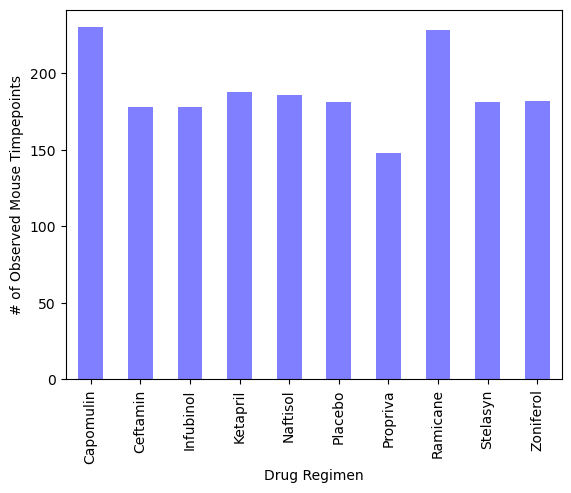

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
row_count = regime_df["Timepoint"].count()
row_count.plot(kind = "bar", color = "blue", alpha = 0.50, xlabel = "Drug Regimen", \
               ylabel = "# of Observed Mouse Timpepoints")
plt.show()

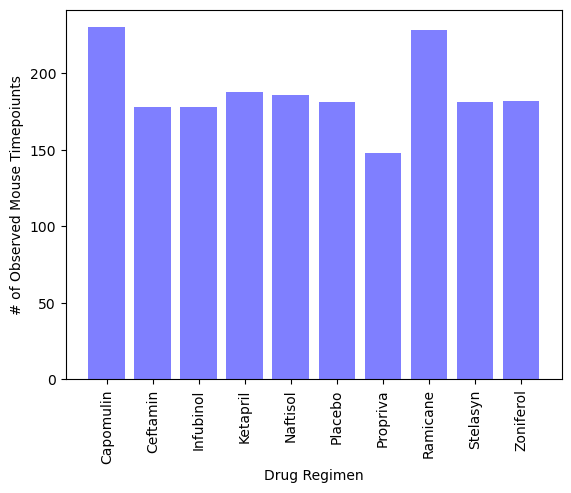

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
rows = regime_df["Timepoint"].count()
labels = lab_data["Drug Regimen"].unique()
labels.sort()
x_axis = np.arange(len(labels))
plt.bar(x_axis, rows, color = "blue", alpha = 0.50)
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, labels, rotation = 90)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoiunts")
plt.show()

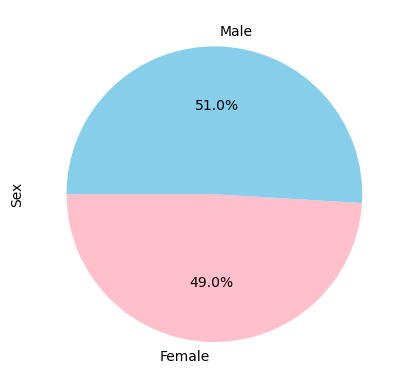

In [30]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_count=lab_data.groupby(["Sex"])["Mouse ID"].count()
sex_count.plot(kind = "pie", autopct = "%1.1f%%", startangle = 180, colors = ["pink", "skyblue"], ylabel = "Sex")
plt.show()

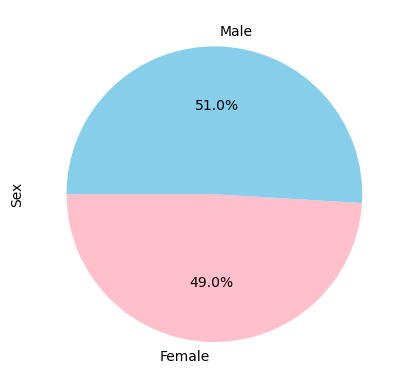

In [31]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = lab_data["Sex"].unique()
labels.sort()
colors = ["pink", "skyblue"]
plt.pie(sex_count, labels = labels, colors=colors, autopct="%1.1f%%", startangle=180)
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [32]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoints = {"Mouse ID":[], "Final Timepoint":[]}
for mouse in lab_data["Mouse ID"].unique():
    timepoints = []
    needed_data = lab_data.loc[lab_data["Mouse ID"]==mouse]
    needed_data.reset_index(drop=True)
    
    for x in range(0,len(needed_data.index)):
        timepoints.append(lab_data.iloc[x, 5])
    max_timepoints["Mouse ID"].append(mouse)
    max_timepoints["Final Timepoint"].append(max(timepoints))
max_timepoints_df = pd.DataFrame(max_timepoints)
max_timepoints_df.head()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
with_finals = pd.merge(max_timepoints_df, lab_data, on = "Mouse ID")
final_only = with_finals.loc[with_finals["Timepoint"]==with_finals["Final Timepoint"]]
final_only=final_only.reset_index(drop = True)

In [33]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

for treatment in treatments:
    data = final_only.loc[final_only["Drug Regimen"]==treatment, :]
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    lower_quartile = data["Tumor Volume (mm3)"].quantile(0.25)
    upper_quartile =  data["Tumor Volume (mm3)"].quantile(0.75)
    iqr = upper_quartile-lower_quartile
    lower_bound = lower_quartile-1.5*iqr
    upper_bound = upper_quartile + 1.5*iqr
    # Locate the rows which contain mice on each drug and get the tumor volumes
    outlier_mice = {}
    for mouse in data["Mouse ID"]:
        tumor_series = data.loc[data["Mouse ID"]==mouse]["Tumor Volume (mm3)"]
        tumor_volume=tumor_series.values
        if tumor_volume[0] > upper_bound or tumor_volume[0] < lower_bound:
            outlier_mice[mouse]=tumor_volume[0]

    # Determine outliers using upper and lower bounds
    print(f'{treatment}\'s potential outliers: {outlier_mice}')

Capomulin's potential outliers: {}
Ramicane's potential outliers: {}
Infubinol's potential outliers: {'c326': 36.3213458}
Ceftamin's potential outliers: {}


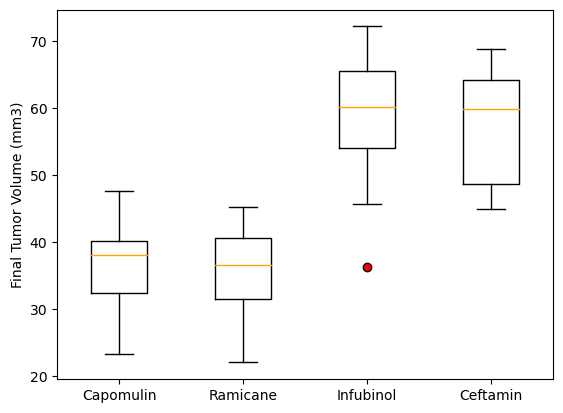

In [38]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
boxes = {}
for treatment in treatments:
    data = final_only.loc[final_only["Drug Regimen"]==treatment, :]
    tumor_vol=data["Tumor Volume (mm3)"]
    boxes[treatment]=tumor_vol
    
box_df = pd.DataFrame(boxes)
box_df.plot(kind="box", flierprops = dict(marker="o", markerfacecolor="red"), \
            boxprops = dict(color="black"), medianprops = dict(color="orange"), \
                whiskerprops = dict(color = "black"), capprops = dict(color = "black"))

plt.ylabel("Final Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

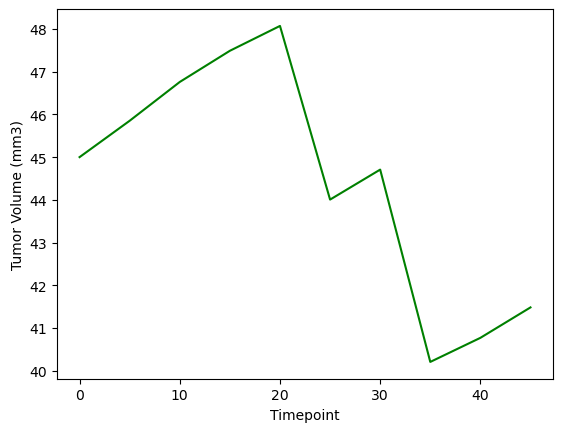

In [35]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse = "l509"
mouse_data = lab_data.loc[lab_data["Mouse ID"] == mouse]
plt.plot(mouse_data["Timepoint"], mouse_data["Tumor Volume (mm3)"], color = "green")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.show()


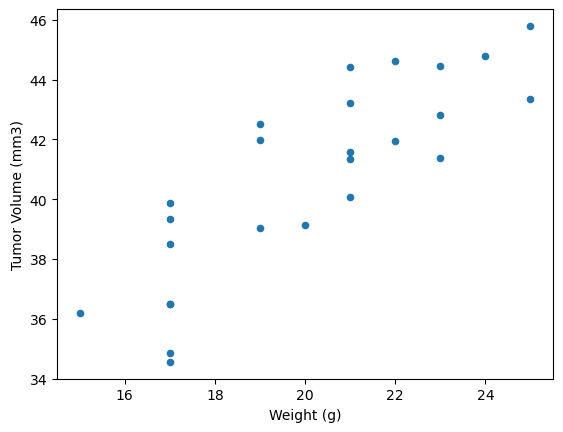

In [36]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
regimen = "Capomulin"
regimen_data = lab_data.loc[lab_data["Drug Regimen"] == regimen]
regimen_data =regimen_data.groupby(["Mouse ID"])
mean_tumor_vol = regimen_data[["Tumor Volume (mm3)", "Weight (g)"]].mean()
mean_tumor_vol.plot(kind = "scatter", x = "Weight (g)", y ="Tumor Volume (mm3)")
plt.show()


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84
The approximate equation of the linear regression is y=0.95x+21.55.


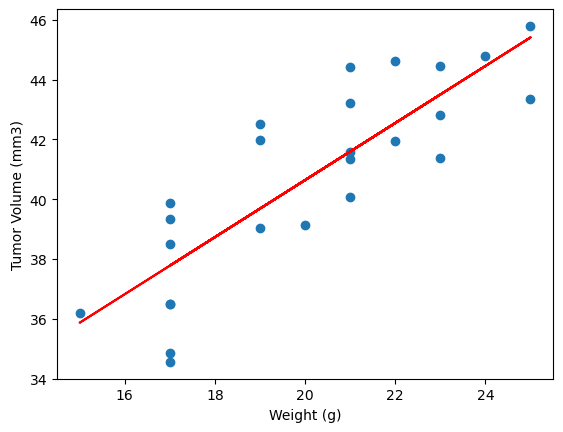

In [37]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
x_values = mean_tumor_vol['Weight (g)']
y_values = mean_tumor_vol['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
print(f"The correlation between mouse weight and the average tumor volume is {round(rvalue,2)}")
print(f'The approximate equation of the linear regression is y={round(slope,2)}x+{round(intercept,2)}.')
plt.show()